In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
 

from tensorflow.keras.preprocessing import image

from keras.applications.imagenet_utils import decode_predictions

from tensorflow.keras.applications.imagenet_utils import preprocess_input

from tensorflow.keras.applications.resnet50 import preprocess_input

import os

from keras.applications.resnet import ResNet50

from keras.applications.vgg16 import VGG16

from keras.applications.inception_v3 import InceptionV3

In [2]:
# Function for plotting model loss
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']

    # Set figure size
    plt.figure(figsize=(12, 8))

    # Generate line plot of training, testing loss over epochs
    plt.plot(train_loss, label='Training Loss', color='#185fad')
    plt.plot(test_loss, label='Testing Loss', color='orange')

    # Set title
    plt.title('Training and Testing Loss by Epoch', fontsize = 25)
    plt.xlabel('Epoch', fontsize = 18)
    plt.ylabel('Categorical Crossentropy', fontsize = 18)
    plt.xticks(np.arange(10), np.arange(10))

    plt.legend(fontsize = 18);

In [3]:
model = ResNet50()

2022-10-12 15:34:18.160480: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
data_path = './training'
data_dir = os.listdir(data_path)

In [6]:
data_dir # this is the data folder

['vegetarian', '.DS_Store', 'places', 'non_vegetarian']

In [7]:
data_dir.remove('.DS_Store')

In [8]:
vegetarian_images = os.listdir(data_path+'/vegetarian')
len(vegetarian_images)

464

In [9]:
non_vegetarian_images = os.listdir(data_path+'/non_vegetarian')
len(non_vegetarian_images)

1279

In [10]:
places_images = os.listdir(data_path+'/places')
len(places_images)

1474

In [11]:
img_data_list = []
labels = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path +'/'+ data + '/' + img
        try:
            img = image.load_img(img_path, target_size= (224,224))
            x = image.img_to_array(img)
            x = preprocess_input(x)
            img_data_list.append(x)
            labels.append(data)
        except:
            continue

Loading images of vegetarian
Loading images of places


/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loading images of non_vegetarian


In [12]:
img_data_list[0]

array([[[115.061   , 100.221   ,  99.32    ],
        [116.061   , 101.221   , 100.32    ],
        [115.061   , 100.221   ,  99.32    ],
        ...,
        [-34.939003, -44.779   , -20.68    ],
        [-32.939003, -43.779   , -15.68    ],
        [-34.939003, -46.779   , -15.68    ]],

       [[116.061   , 101.221   , 100.32    ],
        [117.061   , 102.221   , 101.32    ],
        [117.061   , 102.221   , 101.32    ],
        ...,
        [-29.939003, -39.779   , -15.68    ],
        [-31.939003, -42.779   , -14.68    ],
        [-36.939003, -48.779   , -17.68    ]],

       [[115.061   , 100.221   ,  99.32    ],
        [117.061   , 102.221   , 101.32    ],
        [117.061   , 102.221   , 101.32    ],
        ...,
        [-30.939003, -38.779   , -12.68    ],
        [-33.939003, -42.779   , -14.68    ],
        [-37.939003, -47.779   , -16.68    ]],

       ...,

       [[ 71.061   ,  51.221   ,  41.32    ],
        [ 69.061   ,  49.221   ,  39.32    ],
        [ 69.061   ,  

In [13]:
img_data = np.array(img_data_list)

In [14]:
img_data.shape

(3213, 224, 224, 3)

In [15]:
np.save('train_data.npy', img_data)

In [16]:
np.save('train_labels.npy', labels)

In [17]:
img_data = np.load('train_data.npy')
labels = np.load('train_labels.npy')

In [18]:
len(img_data)

3213

In [19]:
len(labels)

3213

In [20]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', ..., 'non_vegetarian',
       'non_vegetarian', 'non_vegetarian'], dtype='<U14')

In [21]:
num_class = 3
num_of_samples = img_data.shape[0]

In [22]:
num_of_samples

3213

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
names = ['vegetarian', 'places', 'non_vegetarian']

In [25]:
from tensorflow.keras import utils

In [26]:
num_labels = []

In [27]:
for each in labels:
    if each == 'vegetarian':
        num_labels.append(0)
    elif each == 'non_vegetarian':
        num_labels.append(1)
    else:
        num_labels.append(2)

In [28]:
num_labels= np.array(num_labels)

In [29]:
num_labels

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
num_labels[:2]

array([0, 0])

In [31]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', ..., 'non_vegetarian',
       'non_vegetarian', 'non_vegetarian'], dtype='<U14')

In [32]:
x = img_data

In [33]:
y = utils.to_categorical(num_labels, num_classes=3)

In [34]:
y[:2]

array([[1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Train Test Split:

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [37]:
X_train.shape

(2570, 224, 224, 3)

In [38]:
X_test.shape

(643, 224, 224, 3)

# Modeling :

In [39]:
from keras.layers import Input, Flatten, Dense

In [40]:
from keras.models import Model

In [41]:
from tensorflow.keras.optimizers import Adam

In [42]:
image_input = Input(shape=(224, 224,3))

In [43]:
model1 = ResNet50(input_tensor= image_input, include_top=True, weights= 'imagenet')
model1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [44]:
last_layer = model1.get_layer('avg_pool').output

In [45]:
last_layer

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [46]:
x = Flatten(name='Flatten')(last_layer)

In [47]:
out = Dense(3, activation='softmax', name = 'output_layer')(x)

In [48]:
custom_resnet_model = Model(image_input, out)

In [49]:
custom_resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [50]:
for layer in custom_resnet_model.layers[:-1]:
    layer.trainable=False
    
custom_resnet_model.layers[-1].trainable

True

In [51]:
custom_resnet_model.compile(loss='categorical_crossentropy',
                            optimizer= Adam(learning_rate=0.0001),
                            metrics=['acc'])

# Fitting the Model:

In [52]:
X_train.shape

(2570, 224, 224, 3)

In [53]:
history = custom_resnet_model.fit(X_train, y_train, 
                        batch_size=32,
                        epochs=16,
                        verbose=1,
                        validation_data=(X_test, y_test))

Epoch 1/16
81/81 [==============================] - 313s 4s/step - loss: 0.7478 - acc: 0.6852 - val_loss: 0.5393 - val_acc: 0.7854
Epoch 2/16
81/81 [==============================] - 264s 3s/step - loss: 0.4406 - acc: 0.8323 - val_loss: 0.4200 - val_acc: 0.8445
Epoch 3/16
81/81 [==============================] - 271s 3s/step - loss: 0.3693 - acc: 0.8556 - val_loss: 0.3753 - val_acc: 0.8616
Epoch 4/16
81/81 [==============================] - 256s 3s/step - loss: 0.3297 - acc: 0.8712 - val_loss: 0.3501 - val_acc: 0.8740
Epoch 5/16
81/81 [==============================] - 254s 3s/step - loss: 0.3053 - acc: 0.8817 - val_loss: 0.3353 - val_acc: 0.8771
Epoch 6/16
81/81 [==============================] - 244s 3s/step - loss: 0.2876 - acc: 0.8844 - val_loss: 0.3194 - val_acc: 0.8849
Epoch 7/16
81/81 [==============================] - 240s 3s/step - loss: 0.2731 - acc: 0.8903 - val_loss: 0.3067 - val_acc: 0.8865
Epoch 8/16
81/81 [==============================] - 236s 3s/step - loss: 0.2620 - a

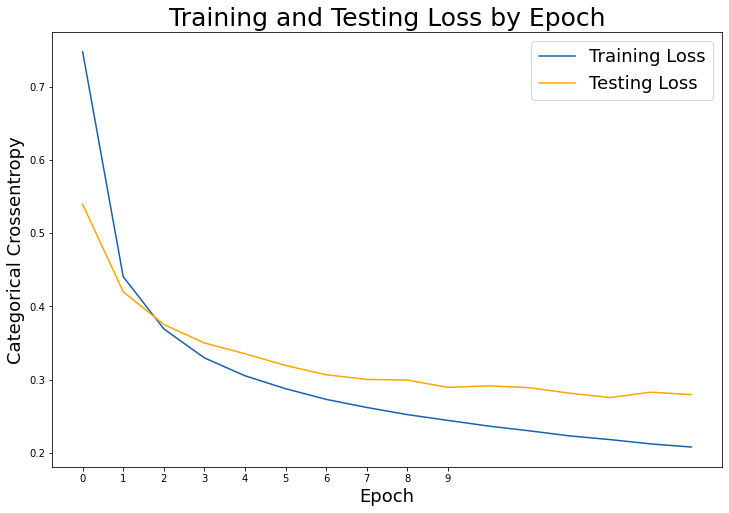

In [54]:
plot_loss(history)

# Predicting on validation data:

In [55]:
data_path = './testing'
data_dir = os.listdir(data_path)

In [56]:
data_dir.remove('.DS_Store')

In [57]:
data_dir

['vegetarian', 'places', 'non_vegetarian']

In [58]:
img_data_list = []
labels = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path+'/'+data + '/' +img
        try:
            img = image.load_img(img_path, target_size= (224,224))
            x = image.img_to_array(img)
            x = preprocess_input(x)
            img_data_list.append(x)
            labels.append(data)
        except:
            continue

Loading images of vegetarian
Loading images of places
Loading images of non_vegetarian


In [59]:
img_data = np.array(img_data_list)

In [60]:
img_data.shape

(156, 224, 224, 3)

In [61]:
np.save('testing_data.npy', img_data)

In [62]:
np.save('testing_labels.npy', labels)

In [63]:
img_data = np.load('testing_data.npy')
labels = np.load('testing_labels.npy')

In [64]:
len(img_data)

156

In [65]:
len(labels)

156

In [66]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [67]:
num_class = 3
num_of_samples = img_data.shape[0]

In [68]:
num_of_samples

156

In [69]:
from tensorflow.keras.utils import to_categorical

In [70]:
names = ['vegetarian', 'places', 'non_vegetarian']

In [71]:
from tensorflow.keras import utils

In [72]:
num_labels = []

In [73]:
for each in labels:
    if each == 'vegetarian':
        num_labels.append(0)
    elif each == 'non_vegetarian':
        num_labels.append(1)
    else:
        num_labels.append(2)

In [74]:
num_labels= np.array(num_labels)

In [75]:
num_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [76]:
num_labels[:2]

array([0, 0])

In [77]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'veget

In [78]:
x = img_data

In [79]:
y = utils.to_categorical(num_labels, num_classes=3)

In [80]:
custom_resnet_model.evaluate(x,y, batch_size=10, verbose=1)

16/16 [==============================] - 10s 606ms/step - loss: 1.1009 - acc: 0.5897


[1.100934386253357, 0.5897436141967773]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


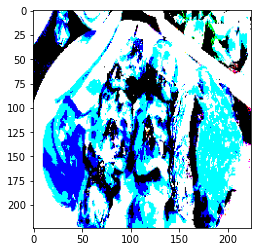

In [81]:
plt.imshow(X_test[156])

In [82]:
from tensorflow.keras.models import load_model

In [83]:
custom_resnet_model.save('resnet.h5')

new_model = load_model('resnet.h5')

new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              